# Import libraries

In [284]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

# Load data

In [287]:
df = pd.read_csv(r"C:\Users\admin\Desktop\Project\Bank Customer Churn Prediction\train.csv")
df.head(5)

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


## Check data quality

In [290]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [292]:
df.isna().sum() / len(df)

id                 0.0
CustomerId         0.0
Surname            0.0
CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64

## Drop unuseful columns

In [295]:
df = df.drop(["id","CustomerId", "Surname"], axis = 1)
df.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


## EDA

In [298]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


Exited
0    0.788401
1    0.211599
Name: proportion, dtype: float64


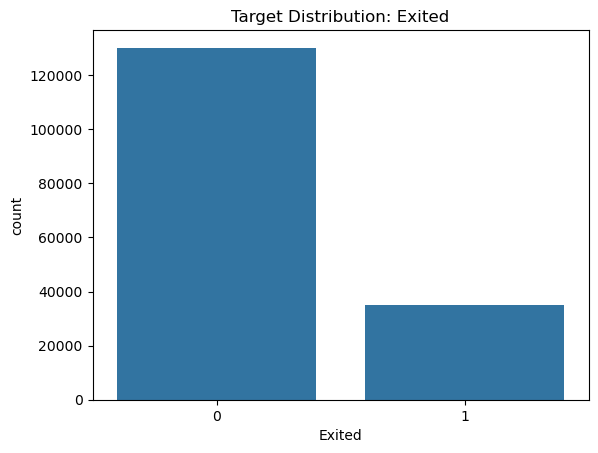

In [300]:
# Kiểm tra phân phối biến mục tiêu
print(df['Exited'].value_counts(normalize=True))

# Vẽ biểu đồ phân phối target
sns.countplot(x='Exited', data=df)
plt.title('Target Distribution: Exited')
plt.show()


In [301]:
#Sort columns into categorical and numerical datatypes
num_cols = ['CreditScore', 'Age', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Tenure']
cat_cols = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

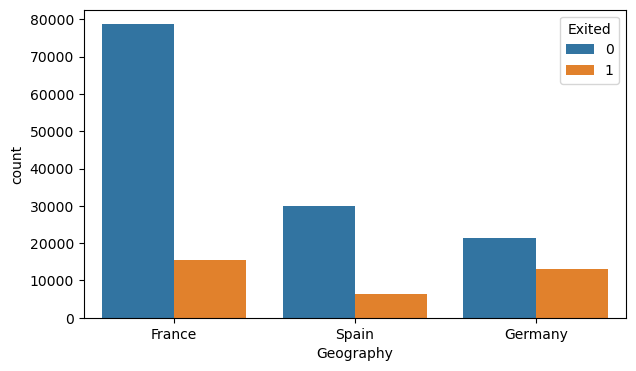

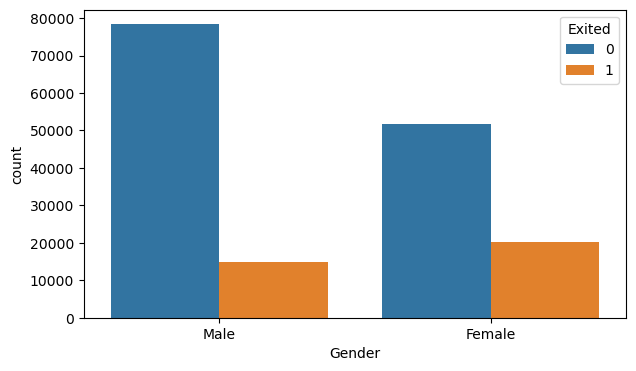

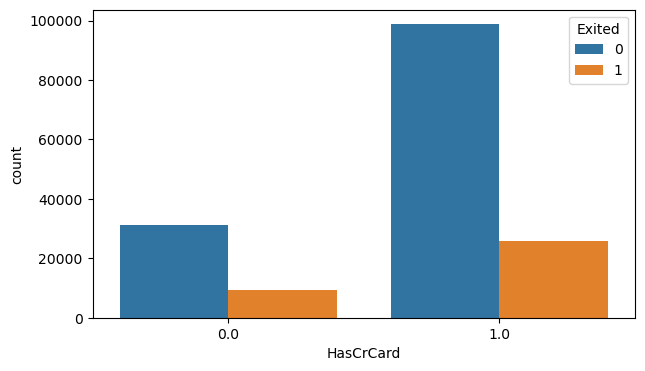

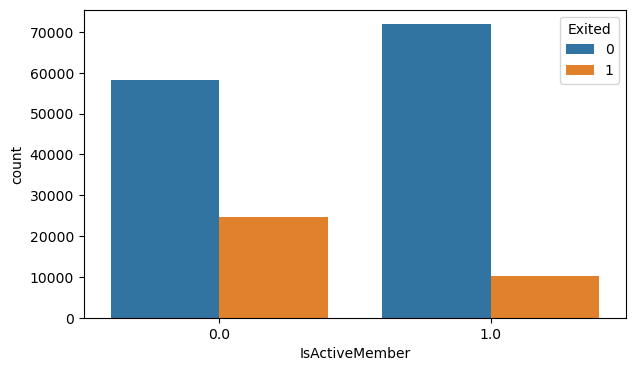

In [302]:
for feature in cat_cols:
    if feature == "Exited":
        continue
    
    plt.subplots(figsize=(7, 4))
    sns.countplot(data=df, x=feature, hue='Exited')
    plt.show()

# Encode categorical data

In [306]:
# One-hot encode các biến categorical
df = pd.get_dummies(df, columns= ['Geography', 'Gender'],drop_first=True)
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,668,33.0,3,0.00,2,1.0,0.0,181449.97,0,False,False,True
1,627,33.0,1,0.00,2,1.0,1.0,49503.50,0,False,False,True
2,678,40.0,10,0.00,2,1.0,0.0,184866.69,0,False,False,True
3,581,34.0,2,148882.54,1,1.0,1.0,84560.88,0,False,False,True
4,716,33.0,5,0.00,2,1.0,1.0,15068.83,0,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
165029,667,33.0,2,0.00,1,1.0,1.0,131834.75,0,False,True,False
165030,792,35.0,3,0.00,1,0.0,0.0,131834.45,0,False,False,True
165031,565,31.0,5,0.00,1,1.0,1.0,127429.56,0,False,False,True
165032,554,30.0,7,161533.00,1,0.0,1.0,71173.03,0,False,True,False


# Chuẩn hóa dữ liệu numeric


In [308]:
scaler = StandardScaler()
feature_cols = df.columns.drop('Exited')
df[feature_cols] = scaler.fit_transform(df[feature_cols])
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,0.144135,-0.578074,-0.719973,-0.883163,0.814298,0.571263,-0.99555,1.369486,0,-0.515098,-0.530199,0.878465
1,-0.367706,-0.578074,-1.432694,-0.883163,0.814298,0.571263,1.00447,-1.254085,0,-0.515098,-0.530199,0.878465
2,0.268974,0.211354,1.774548,-0.883163,0.814298,0.571263,-0.99555,1.437422,0,-0.515098,-0.530199,0.878465
3,-0.941966,-0.465299,-1.076334,1.486918,-1.013348,0.571263,1.00447,-0.557018,0,-0.515098,-0.530199,0.878465
4,0.743362,-0.578074,-0.007253,-0.883163,0.814298,0.571263,1.00447,-1.938770,0,-0.515098,1.886084,0.878465
...,...,...,...,...,...,...,...,...,...,...,...,...
165029,0.131651,-0.578074,-1.076334,-0.883163,-1.013348,0.571263,1.00447,0.382957,0,-0.515098,1.886084,-1.138349
165030,1.692140,-0.352523,-0.719973,-0.883163,-1.013348,-1.750507,-0.99555,0.382951,0,-0.515098,-0.530199,0.878465
165031,-1.141708,-0.803625,-0.007253,-0.883163,-1.013348,0.571263,1.00447,0.295366,0,-0.515098,-0.530199,0.878465
165032,-1.279031,-0.916401,0.705467,1.688303,-1.013348,-1.750507,1.00447,-0.823217,0,-0.515098,1.886084,-1.138349


# Split dataset into train and test set

In [311]:
X = df.drop('Exited', axis=1)
y = df['Exited']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

print("Phân phối target trước SMOTE:\n", y_train.value_counts())



Phân phối target trước SMOTE:
 Exited
0    104090
1     27937
Name: count, dtype: int64


# SMOTE

In [316]:
# Xử lý imbalance với SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Phân phối target sau SMOTE:\n", pd.Series(y_train_res).value_counts())

Phân phối target sau SMOTE:
 Exited
0    104090
1    104090
Name: count, dtype: int64


# Train Model

Training Logistic Regression...

Model: Logistic Regression
Accuracy: 0.7562
ROC AUC: 0.8160

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.76      0.83     26023
           1       0.45      0.73      0.56      6984

    accuracy                           0.76     33007
   macro avg       0.68      0.75      0.70     33007
weighted avg       0.82      0.76      0.77     33007



<Figure size 1000x800 with 0 Axes>

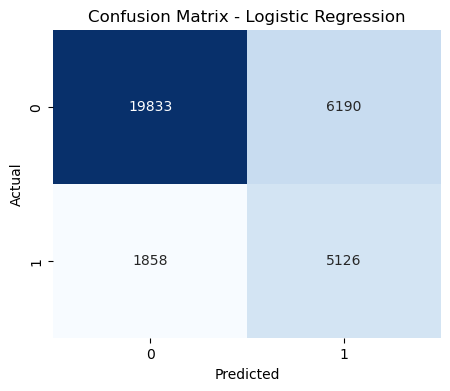

Training Random Forest...


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report, roc_curve

# 1. Khởi tạo model
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# 2. Hàm đánh giá và in kết quả
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)
    cm = confusion_matrix(y_test, y_pred)
    
    print(f"\n{'='*50}")
    print(f"Model: {name}")
    print(f"Accuracy: {acc:.4f}")
    print(f"ROC AUC: {auc:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    return fpr, tpr, auc

# 3. Training và đánh giá từng model, lưu ROC curve để vẽ chung
plt.figure(figsize=(10, 8))
for name, model in models.items():
    print(f"Training {name}...")
    if name == 'XGBoost':
        model.fit(X_train_res, y_train_res,
                  eval_set=[(X_test, y_test)],
                  verbose=False)
    else:
        model.fit(X_train_res, y_train_res)
    
    fpr, tpr, auc = evaluate_model(name, model, X_test, y_test)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.3f})')

# Vẽ đường chuẩn đoán ngẫu nhiên
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
